# Временные ряды

time series — это последовательности чисел на оси времени. Например:
- цена акций компании в начале торгов;
- объём продаж интернет-магазина по дням;
- количество игроков в онлайне по часам.

Повторим, как работать с датами и временем в Pandas. 

Перед вами данные. В файле taxi.csv указано, исторические данные о заказах такси в аэропортах

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/taxi.csv')

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Рассмотрим столбцы таблицы:
 - Datetime — значение даты и времени на временной оси. Переменная называется так же, как и тип данных datetime. В этой таблице интервал равен 10 минутам.
 - num_orders  — количество заказов.

Нужно привести данные к удобному формату, для их анализа выделить временной промежуток, а затем построить график временного ряда.

Дополнительно посмотрите документацию и код ниже, скажите что мы изменили в импорте данных https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

<Axes: xlabel='datetime'>

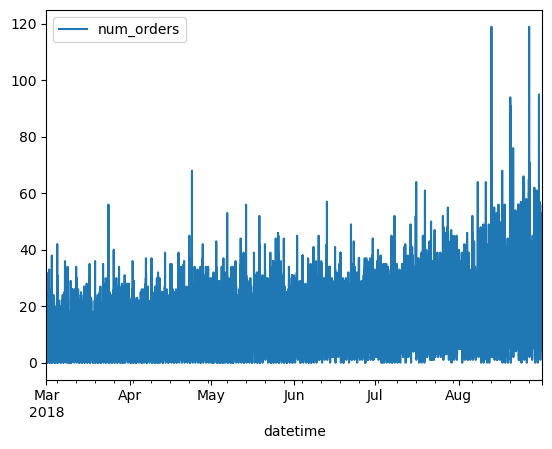

In [4]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df.plot()
#figsize=(16, 5)

<Axes: xlabel='datetime'>

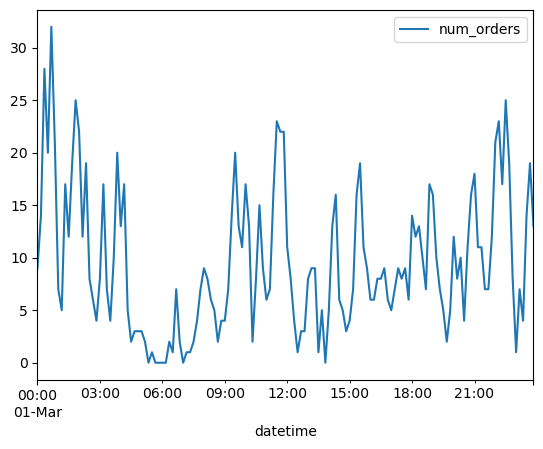

In [5]:
df['2018-03-01':'2018-03-01'].plot()

# Ресемплирование

Как поменять интервал временного ряда? Выполним его ресемплирование.

Ресемплирование, или ресемплинг — это изменение интервала со значениями ряда. Его выполняют в два этапа:
    
Выбирают новую длину интервала. Причём значения из текущего интервала группируются. Допустим, интервал равен 10 минутам. Возьмём новый интервал — 30 минут. В него попадут значения из трёх 10-минутных интервалов.
В каждой группе вычисляется агрегированное значение ряда. Это может быть медиана, среднее, максимум или минимум.

<img src="./pict/1.png"  
  width="600"
/>

Чтобы поменять интервал и сгруппировать значения, вызовем функцию resample(). В аргументе укажем новый интервал. Например:

In [6]:
# 1H англ. hour, 1 час
df.resample('1H') 

# 2W англ. week, 2 недели
df.resample('2W') 

In [7]:
# среднее по каждому часу
df.resample('1H').mean()

,num_orders
datetime,
2018-03-01 00:00:00,20.666667
2018-03-01 01:00:00,14.166667
2018-03-01 02:00:00,11.833333
2018-03-01 03:00:00,11.000000
2018-03-01 04:00:00,7.166667
...,...
2018-08-31 19:00:00,22.666667
2018-08-31 20:00:00,25.666667
2018-08-31 21:00:00,26.500000


<Axes: xlabel='datetime'>

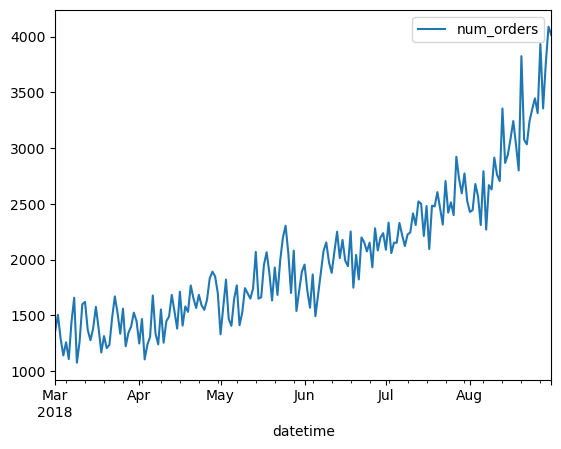

In [8]:
df = df.resample('1D').sum()
df.plot()

# Скользящее среднее

Чтобы во временном ряду снизить колебания, применим скользящее среднее.

rolling mean или moving average — метод сглаживания временных рядов. Его суть заключается в поиске значений, которые меньше всего подвержены колебаниям, то есть средних арифметических.

Метод работает так: экспериментально подбирается размер окна — интервал, в котором выполняют усреднение. Чем интервал больше, тем сильнее сглаживание. Затем окно начинает «скользить» почти от начала ряда к его концу, в каждой точке вычисляя среднее значение ряда и тем самым сглаживая его.
В скользящем среднем окна «наслаиваются» друг на друга и не могут выходить за пределы ряда. Поэтому средних будет чуть меньше, чем исходных значений ряда.

<img src="./pict/2.png"  
  width="1000"
/>

В Pandas скользящее среднее вычисляют в два этапа:

1. Вызовом функции rolling() создают скользящее окно. В аргументе указывают его размер:

In [48]:
# размер окна 7
df.rolling(7)

Rolling [window=7,center=False,axis=0,method=single]

2. Для агрегации значений вызывают функцию mean():

In [49]:
# скользящее среднее с окном размером 7
df.rolling(7).mean().tail()

,num_orders
datetime,
2018-08-27,3343.857143
2018-08-28,3383.857143
2018-08-29,3487.714286
2018-08-30,3608.571429
2018-08-31,3703.714286


In [50]:
df['rolling_mean'] = df.rolling(7).mean()

<Axes: xlabel='datetime'>

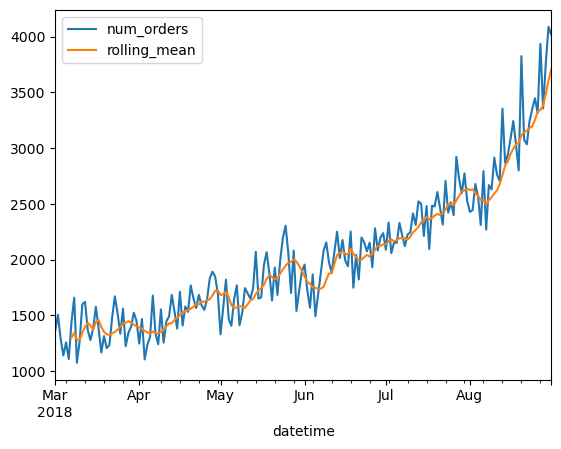

In [53]:
df.plot()

# Тренды и сезонность

Чтобы лучше понимать временной ряд, разберём тренды и сезонность.

<b>Тренд</b> — плавное изменение среднего значения ряда без повторяющихся закономерностей. Например, ежегодное увеличение объёма продаж авиабилетов.

<b>Сезонность</b> — циклично повторяющиеся закономерности во временном ряду. Допустим, рост продаж авиабилетов летом.

Тренды и сезонность зависят от масштаба данных. Нельзя увидеть закономерности, повторяющиеся каждое лето, если есть данные только за год. 

Если эти данные анализировать в масштабе нескольких лет, рост продаж авиабилетов зимой и летом — это уже сезонные изменения.
В модуле tsa.seasonal библиотеки statsmodels есть функция seasonal_decompose(). 

Она раскладывает временной ряд на три составляющие: тренд, сезонность и остаток. Это компонента, которая не объясняется трендом и сезонностью, это шум.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Функция `seasonal_decompose()` принимает временной ряд, а возвращает объект структуры DecomposeResult. В нём есть нужные атрибуты:
    
1. `decomposed.trend` — тренд;
2. `decomposed.seasonal` — сезонная составляющая;
3. `decomposed.resid` — остаток декомпозиции.

In [13]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()

decomposed = seasonal_decompose(df['2018-06-01':'2018-08-01'])

Text(0.5, 1.0, 'Seasonality')

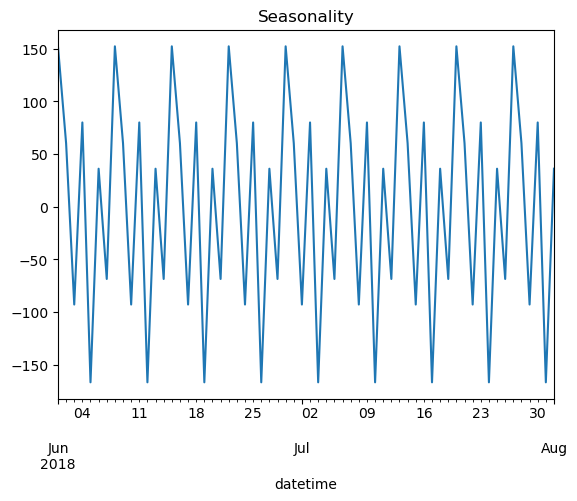

In [14]:
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

Text(0.5, 1.0, 'Trend')

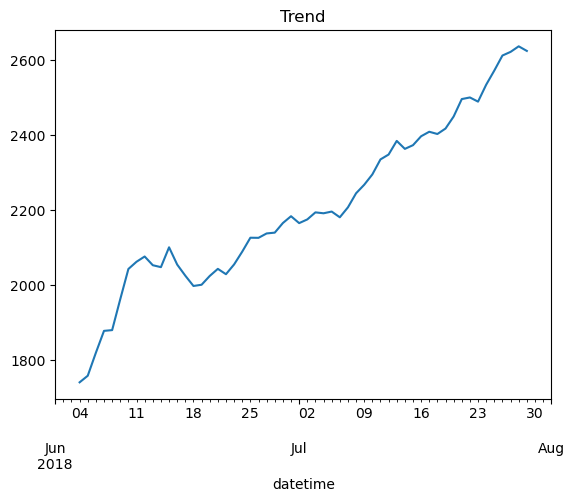

In [15]:
decomposed.trend.plot(ax=plt.gca()) 
plt.title('Trend')

Text(0.5, 1.0, 'Resid')

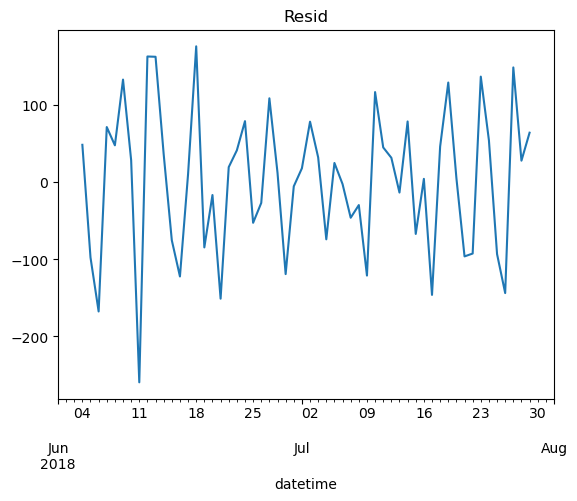

In [16]:
decomposed.resid.plot(ax=plt.gca())
plt.title('Resid')

# Стационарные ряды

Прогнозировать данные помогают стационарные ряды. Разберёмся, что это такое.
В задаче нагрузке такси найдём скользящее стандартное отклонение  — стандартное отклонение по скользящему окну:

<Axes: xlabel='datetime'>

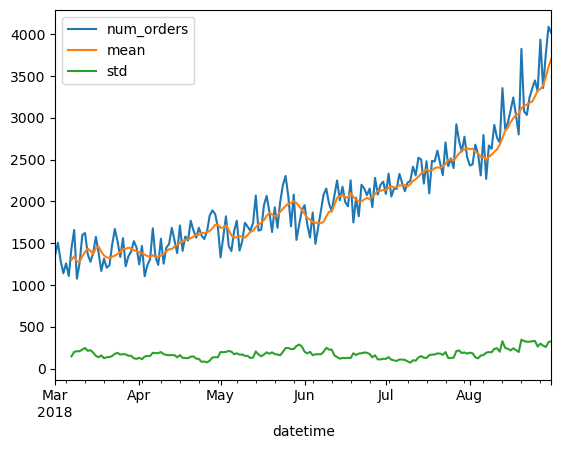

In [17]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()


df['mean'] = df['num_orders'].rolling(7).mean()
df['std'] = df['num_orders'].rolling(7).std()
df.plot() 

В статистике временной ряд описывается стохастическим процессом. Это случайная величина, у которой со временем меняется её распределение. У этой величины есть среднее и дисперсия, которые тоже меняются.

Стохастический процесс стационарный, если его распределение со временем не меняется. Например, к такому процессу относятся периодические колебания значений.

<img src="./pict/3.png"  
  width="600"
/>

Если распределение меняется, то процесс называется нестационарным.

Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды — это ряды, у которых среднее и стандартное отклонение не меняются. Когда среднее и стандартное отклонение первого ряда меняется медленнее второго, то первый ряд «более стационарный», чем второй.

Нестационарные ряды прогнозировать сложнее: их свойства меняются слишком быстро.

`Временной ряд на графике стационарный?`

<img src="./pict/4.png"  
  width="350"
/>

<img src="./pict/6.png"  
  width="350"
/>

<img src="./pict/5.png"  
  width="350"
/>

1. Нет, потому что у него меняется среднее значение.
2. Нет, потому что у него меняется стандартное отклонение.
3. Да, потому что его распределение не зависит от времени.

# Разности временного ряда

Чтобы ряд сделать стационарным, найдём разности его значений.

Разности временного ряда — это набор разностей между соседними элементами временного ряда, т. е. из каждого значения вычитается предыдущее.

Для поиска разностей временного ряда применяется метод shift(). Все значения он сдвигает вдоль временной оси на один шаг вперёд:

<Axes: xlabel='datetime'>

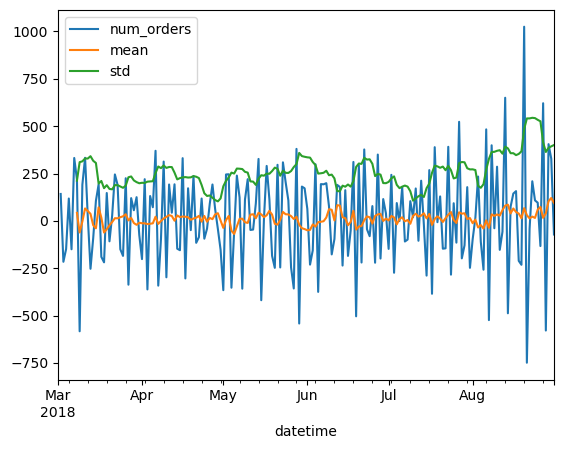

In [74]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()

df['num_orders'] = df - df.shift()

df['mean'] = df['num_orders'].rolling(7).mean()
df['std'] = df['num_orders'].rolling(7).std()
df.plot() 

Последнее значение ряда пропадает: его сдвигать некуда. На месте нулевого — NaN, потому что для него значения нет. Добавим аргумент, чтобы заполнить недостающие значения:

Разности временного ряда более стационарны, чем сам ряд. Например, нелинейный тренд преобразуется в линейный

# Прогнозирование временных рядов

Разберём задачу прогнозирования временных рядов.

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда.

Промежуток времени в будущем, на который строится прогноз, называется горизонтом прогнозирования. В задачах этой темы он будет равен одному шагу.

Если значения временного ряда, или функция `x(t)`, где `t` — время, — это числа, то перед вами задача `регрессии` для временных рядов; если категории — задача `классификации`.

Например, к задачам прогнозирования рядов относятся предсказания:
- количества заказов такси на следующий час,
- объёма доставок курьерской службы на следующий день,
- объёма спроса на товары в интернет-магазине на следующей неделе.

По исходным данным создадим обучающую (train) и тестовую (test) выборки. <b>Перемешивать выборки в задаче прогнозирования временного ряда нельзя</b>. Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: модель не должна обучаться на данных из будущего.

<img src="./pict/7.png"  
  width="800"
/>

Функция `train_test_split()` из модуля `sklearn.model_selection` по умолчанию перемешивает данные. Поэтому укажем аргумент `shuffle` равным `False`, чтобы разделить данные корректно:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.Series([0.1, 0.5, 2.3, 1.2, 1.5, 1.6])
train, test = train_test_split(data, shuffle=False, test_size=0.3)
print('train:')
print(train)
print('test:')
print(test) 

train:
0    0.1
1    0.5
2    2.3
3    1.2
dtype: float64
test:
4    1.5
5    1.6
dtype: float64


# Качество прогноза

Научимся измерять качество предсказания временных рядов и проверять модели на адекватность.

Обучим модель с горизонтом прогнозирования в один день. Такие модели пригодятся в автоматизации принятия технических решений. Например, в задаче энергопотребления модель поможет изменять режим работы генераторов автоматически.

Чтобы проверять качество моделей в наших задачах, возьмём метрику `MAE`. Её можно легко интерпретировать.

Спрогнозировать временные ряды без обучения можно двумя способами:
- Все значения тестовой выборки предсказываются одним и тем же числом (константой). Для метрики `MAE` — это медиана.
- Новое значение `x(t)` прогнозируется предыдущим значением ряда, то есть `x(t-1)`. Этот способ не зависит от метрики.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()

train, test = train_test_split(df, shuffle=False, test_size=0.2)

In [82]:
print('Среднее количество заказов в день:', test['num_orders'].mean())

pred_previous = test.shift(fill_value=train.iloc[len(train)-1, 0])

print("MAE:", mean_absolute_error(test['num_orders'], pred_previous))

Среднее количество заказов в день: 2997.7567567567567
MAE: 280.2972972972973


# Создание признаков

Создадим признаки для горизонта прогнозирования в один шаг.

Напишем функцию для создания признаков. Разберём каждый тип признаков:

1. <b>Календарные признаки</b>

Во многих данных тренды и сезонность привязаны к конкретной дате. Тип datetime64 в Pandas уже содержит нужную информацию, осталось лишь представить её как отдельные столбцы. Рассмотрим пример:

In [83]:
# признак, в котором хранится день недели как число
df['dayofweek'] = df.index.dayofweek

2. <b>Отстающие значения</b> 

Предыдущие значения временного ряда подскажут, будет ли функция `x(t)` расти или уменьшаться. Получим отстающие значения знакомой функцией `shift()`:

In [85]:
df['lag_1'] = df['num_orders'].shift(1)
df['lag_2'] = df['num_orders'].shift(2)
df['lag_3'] = df['num_orders'].shift(7)

Для первых дат есть не все отстающие значения, поэтому в этих строках стоят NaN.

3. <b>Скользящее среднее</b>

Скользящее среднее как признак задаёт общий тренд временного ряда. Повторим, как его вычислять:

In [86]:
df['rolling_mean'] = df['num_orders'].rolling(7).mean()

Скользящее среднее в моменте t учитывает текущее значение ряда `x(t)`. <b>Это некорректно</b>: целевой признак `убежал` в признаки. Вычисление скользящего среднего не должно включать в себя текущее значение ряда.

### Example

In [92]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()

def make_features(data, column, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

    
make_features(df, 'num_orders', 7, 7)
display(df.sample(7))

,num_orders,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean
datetime,,,,,,,,,,
2018-08-08,2669,2,2270.0,2794.0,2311.0,2569.0,2679.0,2445.0,2429.0,2499.571429
2018-03-22,1481,3,1236.0,1207.0,1315.0,1168.0,1387.0,1577.0,1384.0,1324.857143
2018-04-21,1653,5,1769.0,1532.0,1581.0,1409.0,1713.0,1382.0,1537.0,1560.428571
2018-06-01,1956,4,1893.0,1721.0,1540.0,2082.0,1702.0,2059.0,2305.0,1900.285714
2018-03-18,1168,6,1387.0,1577.0,1384.0,1278.0,1369.0,1622.0,1600.0,1459.571429
2018-03-20,1207,1,1315.0,1168.0,1387.0,1577.0,1384.0,1278.0,1369.0,1354.000000
2018-04-30,1697,0,1850.0,1893.0,1832.0,1640.0,1550.0,1591.0,1685.0,1720.142857


# Обучение модели

Обучим линейную регрессию с учётом новых признаков.

Разделим данные на обучающую и тестовую выборки. Отстающие значения и скользящее среднее вычисляются по прошлым данным. Признаки для первых значений тестовой выборки находятся в конце обучающей выборки.

Получить признаки для первых значений обучающей выборки нельзя: исторических данных по ним нет. В предыдущих задачах значения этих признаков были `NaN`. Их нужно удалить.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [95]:
df = pd.read_csv('./data/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

df = df.resample('1D').sum()

In [96]:
def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()


make_features(df, 'num_orders', 7, 7)

In [102]:
train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

In [103]:
train_X = train.drop(columns='num_orders')
train_Y = train['num_orders']
test_X = test.drop(columns='num_orders')
test_Y = test['num_orders']

In [104]:
model = LinearRegression().fit(train_X, train_Y)

In [106]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [108]:
print("MAE train set:", mean_absolute_error(train_Y, train_pred))
print("MAE test set: ", mean_absolute_error(test_Y, test_pred))

MAE train set: 125.44843826548305
MAE test set:  193.24067692898473
